## Loading Taylor Swift Discography Data

In [1]:
#open csv file
import csv

def open_csv_file(file_path):
    try:
        with open(file_path, newline='') as csvfile:
            csv_reader = csv.reader(csvfile)
            for row in csv_reader:
                print(row)
    except FileNotFoundError:
        print("The file could not be found.")
    except Exception as e:
        print("An error occurred:", e)

file_path = "/Users/lauravochita/PycharmProjects/Thesis/taylor_swift.csv"
open_csv_file(file_path)


['album_title', 'album_url', 'category', 'album_track_number', 'song_title', 'song_url', 'song_artists', 'song_release_date', 'song_page_views', 'song_lyrics', 'song_writers', 'song_producers', 'song_tags']
['Taylor Swift', 'https://genius.com/albums/Taylor-Swift/Taylor-Swift', 'Taylor Swift', '1', 'Tim McGraw', 'https://genius.com/Taylor-swift-tim-mcgraw-lyrics', "['Taylor Swift']", '2006-06-19', '245900', '[\'He said the way my blue eyes shined\', \'Put those Georgia stars to shame that night\', \'I said, "That\\\'s a lie"\', \'Just a boy in a Chevy truck\', "That had a tendency of gettin\' stuck", \'On backroads at night\', \'And I was right there beside him all summer long\', \'And then the time we woke up to find that summer gone\', \'But when you think Tim McGraw\', \'I hope you think my favorite song\', \'The one we danced to all night long\', \'The moon like a spotlight on the lake\', \'When you think happiness\', \'I hope you think that little black dress\', \'Think of my head

In [2]:
#transform csv file into dataframe
import pandas as pd
#read csv file
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)  #display all columns
pd.set_option('display.max_colwidth', None)  #display full width of columns
pd.set_option('display.precision', 2)

#delete unnecessary columns (album_url, song_url, song_writers, song_producers, song_artists)
df = df.drop(columns=['album_url', 'song_url', 'song_writers', 'song_producers', 'song_artists'])

#print dataframe head
print(df.head())

    album_title      category  album_track_number              song_title  \
0  Taylor Swift  Taylor Swift                   1              Tim McGraw   
1  Taylor Swift  Taylor Swift                   2         Picture to Burn   
2  Taylor Swift  Taylor Swift                   3  Teardrops On My Guitar   
3  Taylor Swift  Taylor Swift                   4   A Place In This World   
4  Taylor Swift  Taylor Swift                   5             Cold as You   

  song_release_date  song_page_views  \
0        2006-06-19           245900   
1        2006-10-24           261700   
2        2006-10-24           230700   
3        2006-10-24            77200   
4        2006-10-24           128800   

                                                                                                                                                                                                                                                                                                        

### Inspecting the Data

In [3]:
#print size of the dataframe
print(df.shape)

#print the distinct values of the column 'category'
print(df['category'].unique())

(327, 8)
['Taylor Swift' 'Fearless' 'Fearless (TV)' 'Speak Now' 'Speak Now (TV)'
 'Red' 'Red (TV)' '1989' '1989 (TV)' 'reputation' 'Lover' 'folklore'
 'Non-Album Songs' 'evermore' 'Midnights' 'Other Artist Songs']


In [4]:
#print "album_title" unique values
print(df['album_title'].unique())

['Taylor Swift' 'Fearless (Platinum Edition)'
 "Fearless (Taylor's Version)" 'Speak Now (Deluxe)'
 "Speak Now (Taylor's Version)" 'Red (Deluxe Version)'
 "Red (Taylor's Version)" '1989 (Deluxe)'
 "1989 (Taylor's Version) [Tangerine Edition]" 'reputation' 'Lover'
 'folklore (deluxe version)'
 'Christmas Tree Farm - 12" Single Picture Disc'
 'evermore (deluxe version)'
 'Carolina (From The Motion Picture "Where The Crawdads Sing")'
 'Midnights (3am Edition)' 'Midnights (The Late Night Edition)'
 "The More Red (Taylor's Version) Chapter"
 "The More Fearless (Taylor's Version) Chapter" 'The More Lover Chapter'
 'The Taylor Swift Holiday Collection - EP'
 'Cats: Highlights From the Motion Picture Soundtrack' 'iTunes Essentials'
 'Hannah Montana: The Movie (Original Motion Picture Soundtrack)'
 'Fifty Shades Darker (Original Motion Picture Soundtrack)' 'Love Drunk'
 'NOW That’s What I Call Music! 94 [UK]' 'First Two Pages of Frankenstein'
 'How Long Do You Think It’s Gonna Last?' 'Shea'
 'Ke

In [5]:
#group songs by category
grouped = df.groupby('category')
for category, group_df in grouped:
    print(f"Category: {category}")
    unique_album_titles = group_df['album_title'].unique()
    print(unique_album_titles)
    print("\n")

Category: 1989
['1989 (Deluxe)' 'NOW That’s What I Call Music! 56 [US]']


Category: 1989 (TV)
["1989 (Taylor's Version) [Tangerine Edition]"
 '1989 (Taylor’s Version) [Deluxe]']


Category: Fearless
['Fearless (Platinum Edition)']


Category: Fearless (TV)
["Fearless (Taylor's Version)"
 "The More Fearless (Taylor's Version) Chapter"]


Category: Lover
['Lover' 'The More Lover Chapter' 'NOW That’s What I Call Music! 73 [US]']


Category: Midnights
['Midnights (3am Edition)' 'Midnights (The Late Night Edition)'
 'Anti-Hero (Remixes) ']


Category: Non-Album Songs
['Christmas Tree Farm - 12" Single Picture Disc'
 'Carolina (From The Motion Picture "Where The Crawdads Sing")'
 'The Taylor Swift Holiday Collection - EP'
 'Cats: Highlights From the Motion Picture Soundtrack' 'iTunes Essentials'
 'Hannah Montana: The Movie (Original Motion Picture Soundtrack)'
 'Fifty Shades Darker (Original Motion Picture Soundtrack)'
 'NOW That’s What I Call Music! 94 [UK]' nan
 'The Hunger Games: Songs f

### Corpus Formation

In [6]:
#define categories and album titles to exclude from corpus
categories_to_exclude = ['Non-Album Songs', 'Other Artist Songs']
album_titles_to_exclude = ['NOW That’s What I Call Music! 56 [US]', 'The More Lover Chapter',
                           'NOW That’s What I Call Music! 73 [US]', 'Midnights (The Late Night Edition)',
                           'Anti-Hero (Remixes)', 'Speak Now: World Tour Live (Brazilian Edition)']

#filter dataframe to exclude those categories and album titles
filtered_df = df[~df['category'].isin(categories_to_exclude) &
                 ~df['category'].str.contains('(TV)', regex=False) &
                 ~df['album_title'].isin(album_titles_to_exclude)]

print(filtered_df)


                 album_title      category  album_track_number  \
0               Taylor Swift  Taylor Swift                   1   
1               Taylor Swift  Taylor Swift                   2   
2               Taylor Swift  Taylor Swift                   3   
3               Taylor Swift  Taylor Swift                   4   
4               Taylor Swift  Taylor Swift                   5   
..                       ...           ...                 ...   
270  Midnights (3am Edition)     Midnights                  18   
271  Midnights (3am Edition)     Midnights                  19   
272  Midnights (3am Edition)     Midnights                  20   
316     Anti-Hero (Remixes)      Midnights                   1   
322                      NaN  Taylor Swift                   0   

                              song_title song_release_date  song_page_views  \
0                             Tim McGraw        2006-06-19           245900   
1                        Picture to Burn        2

In [7]:
#print size of corpus
print(filtered_df.shape)

(174, 8)


In [8]:
#saving filtered_df as csv file
filtered_df.to_csv('filtered_df.csv')

### Sampling the Data

In [9]:
#compute total sample size
total_corpus_size = len(filtered_df)
total_sample_size = int(total_corpus_size * 0.2)

#group songs by category
grouped = filtered_df.groupby('category')

#initialize empty list to store sampled dataframes
sampled_df_list = []

#iterate over each group for sampling
for category, group_df in grouped:
    #compute sample size for current category
    category_corpus_size = len(group_df)
    category_sample_size = int(category_corpus_size / total_corpus_size * total_sample_size)
    #sample songs from group dataframe
    sampled_group_df = group_df.sample(n=min(category_sample_size, category_corpus_size),
                                       replace=False, random_state=42)

    #append sampled dataframe to sampled_df_list
    sampled_df_list.append(sampled_group_df)

#concatenate sampled dataframes from all groups
sampled_df = pd.concat(sampled_df_list)

#print the sampled dataframe
print(sampled_df)


                     album_title      category  album_track_number  \
146                1989 (Deluxe)          1989                   1   
147                1989 (Deluxe)          1989                   2   
151                1989 (Deluxe)          1989                   6   
14   Fearless (Platinum Edition)      Fearless                   1   
15   Fearless (Platinum Edition)      Fearless                   2   
22   Fearless (Platinum Edition)      Fearless                  10   
199                        Lover         Lover                   1   
200                        Lover         Lover                   2   
207                        Lover         Lover                   9   
253      Midnights (3am Edition)     Midnights                   1   
270      Midnights (3am Edition)     Midnights                  18   
268      Midnights (3am Edition)     Midnights                  16   
254      Midnights (3am Edition)     Midnights                   2   
96          Red (Del

In [10]:
#group songs in sampled_df by category
grouped_sampled = sampled_df.groupby('category')

#print sampled songs in each category
for category, group_df in grouped_sampled:
    print(f"Category: {category}")
    unique_song_titles = group_df['song_title'].unique()
    print(unique_song_titles)
    print("\n")

Category: 1989
['Welcome to New York' 'Blank Space' 'Shake It Off']


Category: Fearless
['Jump Then Fall' 'Untouchable' 'Hey Stephen']


Category: Lover
['I Forgot That You Existed' 'Cruel Summer' 'Cornelia Street']


Category: Midnights
['Lavender Haze' 'Glitch' 'Paris' 'Maroon']


Category: Red
['State of Grace' 'Come Back... Be Here' 'Begin Again']


Category: Speak Now
['Mine' 'Sparks Fly' 'Mean']


Category: Taylor Swift
["Mary's Song (Oh My My My)" "I'm Only Me When I'm With You"]


Category: evermore
['willow' 'champagne problems' 'no body, no crime (Ft. HAIM)']


Category: folklore
['the 1' 'cardigan' 'mirrorball']


Category: reputation
['King of My Heart' 'Dress']




In [11]:
#transform dataframe to csv file
sampled_df.to_csv('sampled_df.csv')

In [12]:
#print size of sampled dataframe
print(sampled_df.shape)

(29, 8)


### Pre-processing the Lyrics


incollection{buffa:hal-03282619,
  TITLE = {{The WASABI Dataset: Cultural, Lyrics and Audio Analysis Metadata About 2 Million Popular Commercially Released Songs}},
  AUTHOR = {Buffa, Michel and Cabrio, Elena and Fell, Michael and Gandon, Fabien and Giboin, Alain and Hennequin, Romain and Michel, Franck and Pauwels, Johan and Pellerin, Guillaume and Tikat, Maroua and Winckler, Marco},
  URL = {https://hal.science/hal-03282619},
  BOOKTITLE = {{The Semantic Web. ESWC 2021. Lecture Notes in Computer Science, vol 12731.}},
  PAGES = {515-531},
  YEAR = {2021},
  MONTH = May,
  DOI = {10.1007/978-3-030-77385-4\_31},
  KEYWORDS = {Music metadata ; Lyrics analysis ; Named entites ; Linked data},
  PDF = {https://hal.science/hal-03282619/file/camera_ready.pdf},
  HAL_ID = {hal-03282619},
  HAL_VERSION = {v1},
}

@article{fell2019love,
  title={Love Me, Love Me, Say (and Write!) that You Love Me: Enriching the WASABI Song Corpus with Lyrics Annotations},
  author={Michael Fell and Elena Cabrio and Elmahdi Korfed and Michel Buffa and Fabien Gandon},
  journal={arXiv},
  year={2019},
  volume={abs/1912.02477}
}

In [13]:
import spacy
from gensim.models.phrases import Phraser, Phrases
from gensim.utils import simple_preprocess

def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

def lemmatization(spacy_nlp, texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = spacy_nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def complex_preprocess(corpus):
    unigrams = [simple_preprocess(text, min_len=1, max_len=100) for text in corpus]
    print('Extracted', len(set(flatten_list(unigrams))), 'unigrams:', unigrams[0][:10])

    bigram_model = Phraser(Phrases(unigrams))
    unigrams_bigrams = [bigram_model[text] for text in unigrams]
    print('Extracted', len(set(flatten_list(unigrams_bigrams))), 'uni/bigrams:', [b for b in unigrams_bigrams[0] if '_' in b][:10])

    spacy_nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    lemmatized_tokens = lemmatization(spacy_nlp, unigrams_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    print('Extracted', len(set(flatten_list(lemmatized_tokens))), 'lemmas:', lemmatized_tokens[0])

    return lemmatized_tokens

#apply preprocessing to lyrics of each sampled song
sampled_df['processed_lyrics'] = complex_preprocess(sampled_df['song_lyrics'])


Extracted 1412 unigrams: ['walkin', 'through', 'a', 'crowd', 'the', 'village', 'is', 'aglow', 'kaleidoscope', 'of']
Extracted 1476 uni/bigrams: ['welcome_to', 'new_york', 'been_waitin', 'welcome_to', 'new_york', 'welcome_to', 'new_york', 'welcome_to', 'new_york', 'been_waitin']
Extracted 1053 lemmas: ['walkin', 'crowd', 'village', 'aglow', 'kaleidoscope', 'loud', 'heartbeat', 'coat', 'here', 'want', 'somethin', 'more', 'searchin', 'sound', 'hadn', 'hear', 'before', 'say', 'new_york', 's', 'new_york', 'new_york', 's', 'new_york', 'new_york', 's', 'new', 'soundtrack', 'dance', 'beat', 'beat', 'forevermore', 'light', 'so', 'bright', 'never', 'blind', 'welcome_to', 'new_york', 's', 'new_york', 'new_york', 'first', 'drop', 'bag', 'apartment', 'floor', 'take', 'broken', 'heart', 'put', 'drawer', 'here', 'else', 'want', 'want', 'boy', 'boy', 'girl', 'girl', 'welcome_to', 'new_york', 's', 'new_york', 'new_york', 's', 'new_york', 'new_york', 's', 'new', 'soundtrack', 'dance', 'beat', 'beat', 'f

### Topic Modeling

incollection{buffa:hal-03282619,
  TITLE = {{The WASABI Dataset: Cultural, Lyrics and Audio Analysis Metadata About 2 Million Popular Commercially Released Songs}},
  AUTHOR = {Buffa, Michel and Cabrio, Elena and Fell, Michael and Gandon, Fabien and Giboin, Alain and Hennequin, Romain and Michel, Franck and Pauwels, Johan and Pellerin, Guillaume and Tikat, Maroua and Winckler, Marco},
  URL = {https://hal.science/hal-03282619},
  BOOKTITLE = {{The Semantic Web. ESWC 2021. Lecture Notes in Computer Science, vol 12731.}},
  PAGES = {515-531},
  YEAR = {2021},
  MONTH = May,
  DOI = {10.1007/978-3-030-77385-4\_31},
  KEYWORDS = {Music metadata ; Lyrics analysis ; Named entites ; Linked data},
  PDF = {https://hal.science/hal-03282619/file/camera_ready.pdf},
  HAL_ID = {hal-03282619},
  HAL_VERSION = {v1},
}

@article{fell2019love,
  title={Love Me, Love Me, Say (and Write!) that You Love Me: Enriching the WASABI Song Corpus with Lyrics Annotations},
  author={Michael Fell and Elena Cabrio and Elmahdi Korfed and Michel Buffa and Fabien Gandon},
  journal={arXiv},
  year={2019},
  volume={abs/1912.02477}
}

In [14]:
import joblib

#load pre-trained LDA model and dictionary
DATA_PATH = '/Users/lauravochita/PycharmProjects/Thesis/'
topic_model = joblib.load(DATA_PATH + 'lda_model_16/lda_model_16.jl')
dictionary = pd.read_pickle(DATA_PATH + 'lda_model_16/dictionary.pickle')

#convert preprocessed lyrics to bag-of-words representation
corpus_bow = [dictionary.doc2bow(text) for text in sampled_df['processed_lyrics']]

#compute topic distribution for each song
for i, (song_title, text) in enumerate(zip(sampled_df['song_title'], corpus_bow), 1):
    print(f"\nSong Title: {song_title}")
    print(f"Topic Distribution:")
    print(topic_model[text])


Song Title: Welcome to New York
Topic Distribution:
[(0, 0.044935554), (1, 0.010599356), (2, 0.011648497), (4, 0.017840149), (5, 0.048728485), (6, 0.018885953), (7, 0.022837264), (8, 0.012517125), (9, 0.010348084), (15, 0.04906481), (16, 0.023301054), (17, 0.014600133), (18, 0.017828412), (21, 0.011581246), (23, 0.07218884), (24, 0.01221251), (25, 0.012042914), (27, 0.158133), (28, 0.027530517), (33, 0.011935554), (34, 0.012877753), (36, 0.023445627), (37, 0.024551934), (45, 0.03405631), (48, 0.023811651), (49, 0.017963476), (50, 0.012474491), (52, 0.018792296), (54, 0.015557224), (56, 0.01955433), (59, 0.0101642385)]

Song Title: Blank Space
Topic Distribution:
[(2, 0.022745404), (4, 0.016336326), (7, 0.023159089), (8, 0.04030525), (9, 0.0108882), (11, 0.010467069), (12, 0.015211262), (13, 0.011189799), (14, 0.015842337), (16, 0.026045766), (19, 0.01755871), (20, 0.031241478), (21, 0.034481023), (22, 0.011872427), (24, 0.010023331), (25, 0.012748471), (26, 0.023018437), (31, 0.032406

#### Adapted Estimation Process

In [15]:
#define function to identify top-3 topics and their essential (top-5) words for each song
def identify_top_topics_and_words(song_title, text, top_n=3, top_words=5):
    top_topics = []

    #sort topics by mixture proportion in descending order
    sorted_topics = sorted(topic_model[text], key=lambda x: x[1], reverse=True)[:top_n]

    for topic, prob in sorted_topics:
        topic_words = topic_model.show_topic(topic)
        sorted_topic_words = sorted(topic_words, key=lambda x: x[1], reverse=True)[:top_words]
        top_words_list = [word for word, _ in sorted_topic_words]
        word_distribution = {word: prob for word, prob in sorted_topic_words}
        top_topics.append((topic, prob, top_words_list, word_distribution))

    return top_topics

#print top topics, their essential words, and word distributions for each song
for song_title, text in zip(sampled_df['song_title'], corpus_bow):
    top_topics_and_words = identify_top_topics_and_words(song_title, text)
    print(f"\nSong Title: {song_title}")
    print("Top Topics, Essential Words, and Word Distributions:")
    for topic_num, topic_prob, essential_words, word_distribution in top_topics_and_words:
        print(f"Topic {topic_num} (Probability: {topic_prob:.4f}): {essential_words}")
        print("Word Distribution:")
        for word, prob in word_distribution.items():
            print(f"{word}: {prob:.4f}")



Song Title: Welcome to New York
Top Topics, Essential Words, and Word Distributions:
Topic 27 (Probability: 0.1581): ['live', 'wake', 'easy', 'city', 'tomorrow']
Word Distribution:
live: 0.2536
wake: 0.0638
easy: 0.0626
city: 0.0585
tomorrow: 0.0477
Topic 23 (Probability: 0.0722): ['play', 'move', 'song', 'dance', 'sing']
Word Distribution:
play: 0.0796
move: 0.0750
song: 0.0689
dance: 0.0644
sing: 0.0495
Topic 15 (Probability: 0.0491): ['night', 'more', 'dream', 'sun', 'star']
Word Distribution:
night: 0.1758
more: 0.1462
dream: 0.1227
sun: 0.0609
star: 0.0533

Song Title: Blank Space
Top Topics, Essential Words, and Word Distributions:
Topic 52 (Probability: 0.0775): ['girl', 'like', 'kiss', 'kind', 'pretty']
Word Distribution:
girl: 0.1828
like: 0.0714
kiss: 0.0451
kind: 0.0332
pretty: 0.0304
Topic 32 (Probability: 0.0434): ['get', 'run', 'better', 'enough', 've']
Word Distribution:
get: 0.6779
run: 0.1067
better: 0.0343
enough: 0.0295
ve: 0.0170
Topic 36 (Probability: 0.0433): ['l

#### Playlist Curation (Topic-based Song Clustering)

##### Topic-based Clustering for k = 4

/Users/lauravochita/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


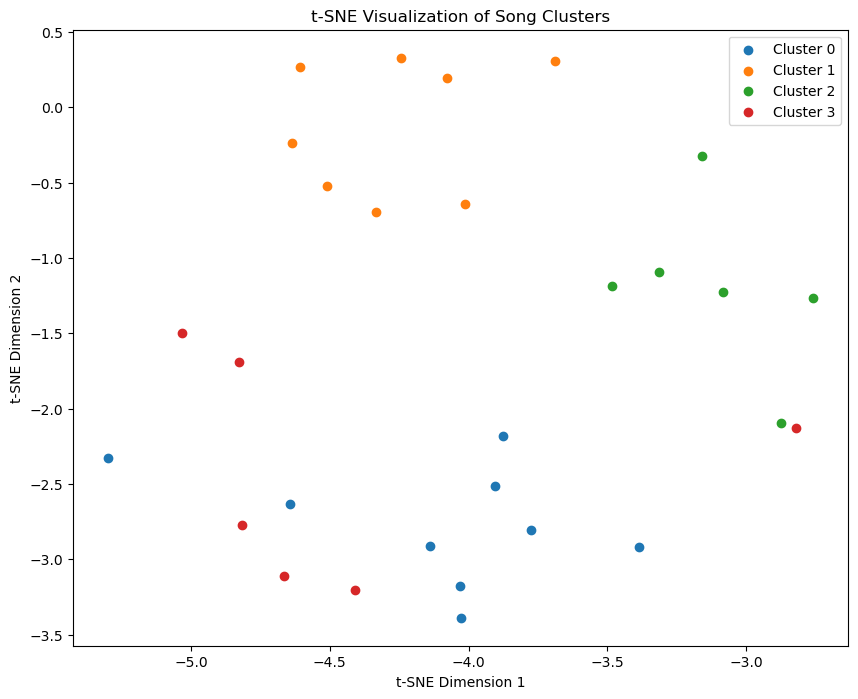

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

#define function to extract top topics for each song and perform clustering
def cluster_songs_based_on_topics(sampled_df, corpus_bow, top_n=3, n_clusters=4):
    #extract top topics for each song
    top_topics_list = []

    for song_title, text in zip(sampled_df['song_title'], corpus_bow):
        top_topics_and_words = identify_top_topics_and_words(song_title, text, top_n=top_n)
        top_topics = [topic for topic, _, _, _ in top_topics_and_words]
        top_topics_list.append(top_topics)

    #convert the list to a numpy array
    X = np.array(top_topics_list)

    #perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    return X, clusters

#cluster the songs based on topics
X, clusters = cluster_songs_based_on_topics(sampled_df, corpus_bow, top_n=3, n_clusters=4)

#determine perplexity based on the number of samples
perplexity = min(20, len(X) - 1)

#perform t-sne dimensionality reduction
tsne = TSNE(n_components=2,perplexity= perplexity, random_state=42)
X_embedded = tsne.fit_transform(X)

#plot the clusters
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(clusters):
    plt.scatter(X_embedded[clusters == cluster_label, 0],
                X_embedded[clusters == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('t-SNE Visualization of Song Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [17]:
#model evaluation
from sklearn.metrics import silhouette_score

#compute silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3187376902515472


In [18]:
#print song titles in each cluster
for cluster_label in np.unique(clusters):
    print(f"Cluster {cluster_label}:")
    for song_title in sampled_df.loc[clusters == cluster_label, 'song_title']:
        print(song_title)
    print()

Cluster 0:
Blank Space
Jump Then Fall
I Forgot That You Existed
Glitch
Paris
Begin Again
Mary's Song (Oh My My My)
I'm Only Me When I'm With You
cardigan

Cluster 1:
Welcome to New York
Shake It Off
Cornelia Street
Lavender Haze
State of Grace
Come Back... Be Here
no body, no crime (Ft. HAIM)
the 1

Cluster 2:
Hey Stephen
Mean
willow
champagne problems
mirrorball
Dress

Cluster 3:
Untouchable
Cruel Summer
Maroon
Mine
Sparks Fly
King of My Heart



##### Topic-based Clustering for k = 3

/Users/lauravochita/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


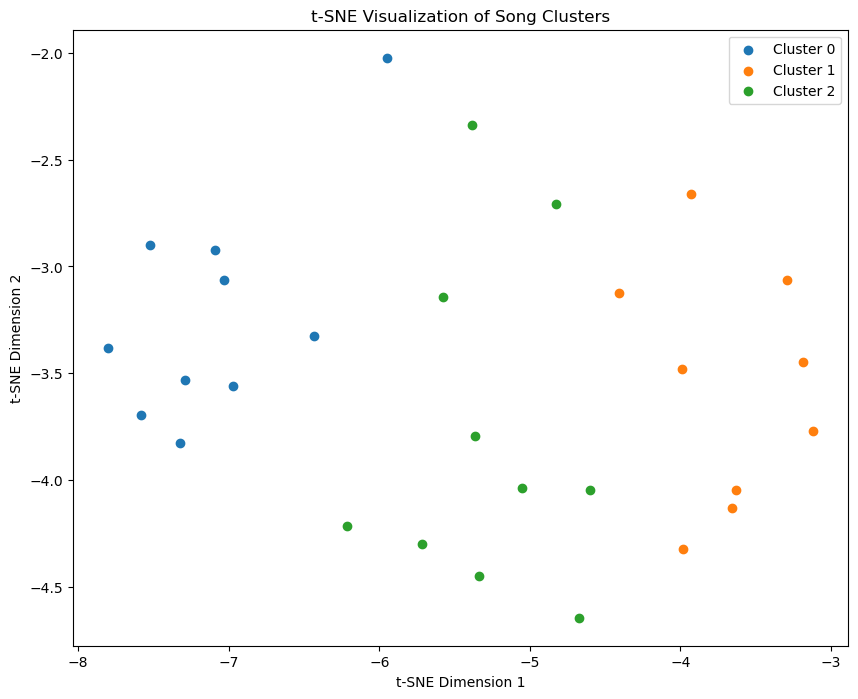

Average Intra-cluster Distance: 17.091046361028777
Average Inter-cluster Distance: 41.05275290531173


In [92]:
from sklearn.metrics import pairwise_distances

def cluster_songs_based_on_topics(sampled_df, corpus_bow, top_n=3, n_clusters=3):
    #extract top topics for each song
    top_topics_list = []

    for song_title, text in zip(sampled_df['song_title'], corpus_bow):
        top_topics_and_words = identify_top_topics_and_words(song_title, text, top_n=top_n)
        top_topics = [topic for topic, _, _, _ in top_topics_and_words]
        top_topics_list.append(top_topics)

    #convert the list to a numpy array
    X = np.array(top_topics_list)

    #determine perplexity based on the number of samples
    perplexity = min(20, len(X) - 1)

    #perform t-sne dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)  # Apply t-SNE

    #perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    #compute the cluster centers
    cluster_centers = kmeans.cluster_centers_

    #compute pairwise distances between cluster centers
    cluster_distances = pairwise_distances(cluster_centers)

    #compute intra-cluster distances
    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_indices = np.where(clusters == i)[0]
        distances_within_cluster = pairwise_distances(X[clusters == i], [cluster_centers[i]])
        intra_cluster_distances.extend(distances_within_cluster)

    #compute average intra-cluster distance
    avg_intra_cluster_distance = np.mean(intra_cluster_distances)

    #compute average inter-cluster distance
    avg_inter_cluster_distance = np.mean(cluster_distances[np.triu_indices(n_clusters, k=1)])

    #plot the clusters
    plt.figure(figsize=(10, 8))
    for cluster_label in np.unique(clusters):
        plt.scatter(X_tsne[clusters == cluster_label, 0],
                    X_tsne[clusters == cluster_label, 1],
                    label=f'Cluster {cluster_label}')
    plt.title('t-SNE Visualization of Song Clusters')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

    return avg_intra_cluster_distance, avg_inter_cluster_distance

#perform clustering and compute distances
avg_intra_cluster_distance, avg_inter_cluster_distance = cluster_songs_based_on_topics(sampled_df, corpus_bow, top_n=3, n_clusters=3)

print("Average Intra-cluster Distance:", avg_intra_cluster_distance)
print("Average Inter-cluster Distance:", avg_inter_cluster_distance)


In [93]:
#model evaluation
from sklearn.metrics import silhouette_score

#compute silhouette score
silhouette_avg = silhouette_score(X_tsne, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.4297


In [95]:
#store song titles in each each cluster
song_titles_by_cluster = [[] for _ in range(3)]
for i, song_title in enumerate(sampled_df['song_title']):
    cluster_label = clusters[i]
    song_titles_by_cluster[cluster_label].append(song_title)

# print song titles in each cluster
for i, titles in enumerate(song_titles_by_cluster):
    print(f"Cluster {i}:")
    for title in titles:
        print(title)
    print()


Cluster 0:
Blank Space
Untouchable
Hey Stephen
Cornelia Street
Lavender Haze
Glitch
Maroon
Mine
no body, no crime (Ft. HAIM)
cardigan

Cluster 1:
Welcome to New York
Shake It Off
I Forgot That You Existed
Cruel Summer
Mean
willow
champagne problems
King of My Heart
Dress

Cluster 2:
Jump Then Fall
Paris
State of Grace
Come Back... Be Here
Begin Again
Sparks Fly
Mary's Song (Oh My My My)
I'm Only Me When I'm With You
the 1
mirrorball



## Corpus Experimentation

### Corpus data pre-processing

In [38]:
import spacy
from gensim.models.phrases import Phraser, Phrases
from gensim.utils import simple_preprocess

def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

def lemmatization(spacy_nlp, texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = spacy_nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def complex_preprocess(corpus):
    unigrams = [simple_preprocess(text, min_len=1, max_len=100) for text in corpus]
    print('Extracted', len(set(flatten_list(unigrams))), 'unigrams:', unigrams[0][:10])

    bigram_model = Phraser(Phrases(unigrams))
    unigrams_bigrams = [bigram_model[text] for text in unigrams]
    print('Extracted', len(set(flatten_list(unigrams_bigrams))), 'uni/bigrams:', [b for b in unigrams_bigrams[0] if '_' in b][:10])

    spacy_nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    lemmatized_tokens = lemmatization(spacy_nlp, unigrams_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    print('Extracted', len(set(flatten_list(lemmatized_tokens))), 'lemmas:', lemmatized_tokens[0])

    return lemmatized_tokens

#apply preprocessing to each song in the filtered dataframe
filtered_df['processed_lyrics'] = complex_preprocess(filtered_df['song_lyrics'])


Extracted 3736 unigrams: ['he', 'said', 'the', 'way', 'my', 'blue', 'eyes', 'shined', 'put', 'those']
Extracted 4005 uni/bigrams: ['think_tim', 'my_head', 'think_tim', 'think_tim', 'my_head', 'think_tim', 'first_time', 'think_tim', 'my_head', 'think_tim']
Extracted 2879 lemmas: ['say', 'way', 'blue', 'eye', 'shine', 'put', 'star', 'shame', 'night', 'say', 's', 'lie', 'just', 'boy', 'chevy', 'truck', 'tendency', 'gettin', 'stick', 'backroad', 'night', 'right', 'there', 'summer', 'long', 'then', 'time', 'wake', 'find', 'summer', 'go', 'think_tim', 'mcgraw', 'hope', 'think', 'favorite', 'song', 'one', 'dance', 'night', 'long', 'moon', 'spotlight', 'lake', 'think', 'happiness', 'hope', 'think', 'little', 'black', 'dress', 'think', 'my_head', 'chest', 'old', 'fade', 'blue', 'jean', 'think_tim', 'mcgraw', 'hope', 'think', 'see', 'month', 'tear', 'thankin', 'weren', 'here', 'see', 'box', 'bed', 'letter', 'never', 'read', 'summer', 's', 'hard', 'find', 'little', 'bittersweet', 'lookin', 'back'

/var/folders/q9/5p8dw8j11x53h2wkrpcg7czh0000gn/T/ipykernel_99254/2052185866.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['processed_lyrics'] = complex_preprocess(filtered_df['song_lyrics'])


### Topic Modeling on Corpus

In [40]:
import joblib
import pandas as pd

#load LDA model and dictionary
DATA_PATH = '/Users/lauravochita/PycharmProjects/Thesis/'
topic_model = joblib.load(DATA_PATH + 'lda_model_16/lda_model_16.jl')
dictionary = pd.read_pickle(DATA_PATH + 'lda_model_16/dictionary.pickle')

#convert preprocessed lyrics to bag-of-words representation
corpus_bow = [dictionary.doc2bow(text) for text in filtered_df['processed_lyrics']]

#compute topic distribution for each song
for i, (song_title, text) in enumerate(zip(filtered_df['song_title'], corpus_bow), 1):
    print(f"\nSong Title: {song_title}")
    print(f"Topic Distribution:")
    print(topic_model[text])



Song Title: Tim McGraw
Topic Distribution:
[(0, 0.01042451), (5, 0.017428864), (6, 0.012793403), (7, 0.01942312), (8, 0.010230383), (9, 0.019210279), (11, 0.0108053405), (13, 0.01662783), (15, 0.04820732), (17, 0.013512237), (20, 0.015345758), (21, 0.025016166), (22, 0.030491838), (23, 0.045640398), (24, 0.014048392), (25, 0.014183421), (26, 0.016277632), (27, 0.010960868), (28, 0.011621722), (29, 0.014882147), (33, 0.014672589), (34, 0.03527294), (37, 0.041073214), (41, 0.014548384), (45, 0.0146593405), (46, 0.17417611), (47, 0.017999602), (48, 0.034923103), (52, 0.05825245), (53, 0.021737598), (57, 0.016533138), (58, 0.0105639305), (59, 0.01024853)]

Song Title: Picture to Burn
Topic Distribution:
[(0, 0.05227189), (6, 0.021262482), (7, 0.024379173), (9, 0.030326882), (11, 0.0138613945), (13, 0.011087728), (16, 0.017965056), (21, 0.012954278), (22, 0.016274996), (25, 0.017965801), (31, 0.04235461), (32, 0.011991661), (33, 0.033557713), (35, 0.014593175), (36, 0.01871986), (37, 0.041

In [41]:
import joblib
import pandas as pd

#load LDA model and dictionary
DATA_PATH = '/Users/lauravochita/PycharmProjects/Thesis/'
topic_model = joblib.load(DATA_PATH + 'lda_model_16/lda_model_16.jl')
dictionary = pd.read_pickle(DATA_PATH + 'lda_model_16/dictionary.pickle')

#convert preprocessed lyrics to bag-of-words representation
corpus_bow = [dictionary.doc2bow(text) for text in filtered_df['processed_lyrics']]

def identify_top_topics_and_words(song_title, text, top_n=3, top_words=5):
    top_topics = []

    #sort topics by probability in descending order
    sorted_topics = sorted(topic_model[text], key=lambda x: x[1], reverse=True)[:top_n]

    for topic, prob in sorted_topics:
        topic_words = topic_model.show_topic(topic)
        sorted_topic_words = sorted(topic_words, key=lambda x: x[1], reverse=True)[:top_words]
        top_words_list = [word for word, _ in sorted_topic_words]
        word_distribution = {word: prob for word, prob in sorted_topic_words}
        top_topics.append((topic, prob, top_words_list, word_distribution))

    return top_topics

#print top topics, their top words, and word distributions for each song
for song_title, text in zip(filtered_df['song_title'], corpus_bow):
    top_topics_and_words = identify_top_topics_and_words(song_title, text)
    print(f"\nSong Title: {song_title}")
    print("Top Topics, Essential Words, and Word Distributions:")
    for topic_num, topic_prob, essential_words, word_distribution in top_topics_and_words:
        print(f"Topic {topic_num} (Probability: {topic_prob:.4f}): {essential_words}")
        print("Word Distribution:")
        for word, prob in word_distribution.items():
            print(f"{word}: {prob:.4f}")



Song Title: Tim McGraw
Top Topics, Essential Words, and Word Distributions:
Topic 46 (Probability: 0.1742): ['think', 'friend', 'black', 'hate', 'hope']
Word Distribution:
think: 0.3383
friend: 0.1171
black: 0.0713
hate: 0.0694
hope: 0.0337
Topic 52 (Probability: 0.0583): ['girl', 'like', 'kiss', 'kind', 'pretty']
Word Distribution:
girl: 0.1828
like: 0.0714
kiss: 0.0451
kind: 0.0332
pretty: 0.0304
Topic 15 (Probability: 0.0482): ['night', 'more', 'dream', 'sun', 'star']
Word Distribution:
night: 0.1758
more: 0.1462
dream: 0.1227
sun: 0.0609
star: 0.0533

Song Title: Picture to Burn
Top Topics, Essential Words, and Word Distributions:
Topic 41 (Probability: 0.0561): ['m', 'i', 'ride', 'cause', 'train']
Word Distribution:
m: 0.6385
i: 0.1689
ride: 0.0357
cause: 0.0194
train: 0.0176
Topic 0 (Probability: 0.0523): ['never', 'wish', 'miss', 'know', 'really']
Word Distribution:
never: 0.4259
wish: 0.0721
miss: 0.0605
know: 0.0521
really: 0.0501
Topic 46 (Probability: 0.0513): ['think', 'fr

### Topic Clustering for Corpus

/Users/lauravochita/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


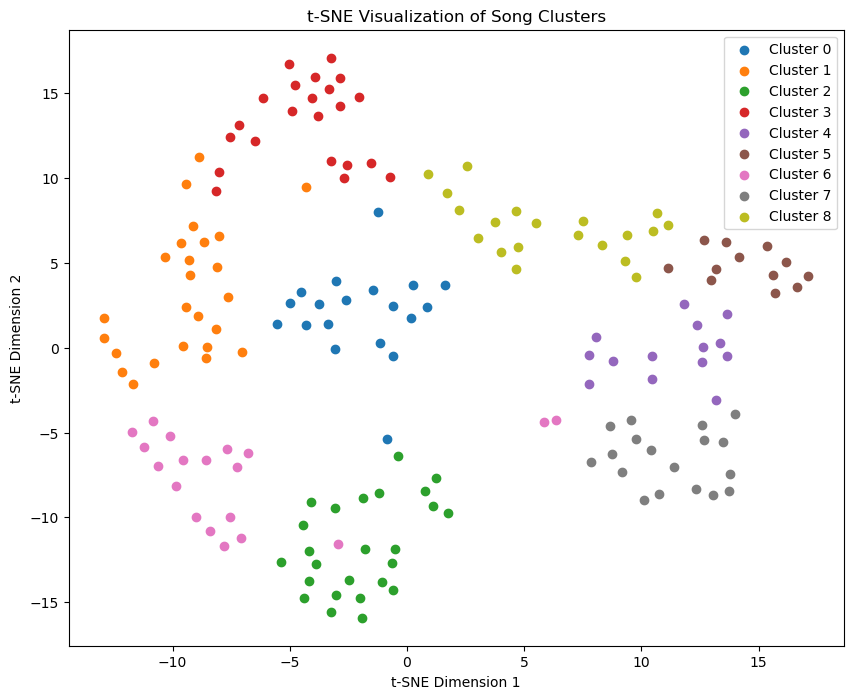

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

#define a function to extract top topics for each song and perform clustering
def cluster_songs_based_on_topics(filtered_df, corpus_bow, top_n=3, n_clusters=9):
    #extract top topics for each song
    top_topics_list = []

    for song_title, text in zip(filtered_df['song_title'], corpus_bow):
        top_topics_and_words = identify_top_topics_and_words(song_title, text, top_n=top_n)
        top_topics = [topic for topic, _, _, _ in top_topics_and_words]
        #ensure each song has exactly top_n topics
        if len(top_topics) < top_n:
            top_topics += [0] * (top_n - len(top_topics))  # Padding with 0 if fewer topics
        top_topics_list.append(top_topics)

    #convert the list to a numpy array
    X = np.array(top_topics_list)

    #perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    return X, clusters

#convert preprocessed lyrics to bag-of-words representation
corpus_bow = [dictionary.doc2bow(text) for text in filtered_df['processed_lyrics']]

#perform clustering
X, clusters = cluster_songs_based_on_topics(filtered_df, corpus_bow, top_n=3, n_clusters=9)

#perform dimensionality reduction with t-SNE
perplexity = min(20, len(X) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_embedded = tsne.fit_transform(X)

#plot the clusters
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(clusters):
    plt.scatter(X_embedded[clusters == cluster_label, 0],
                X_embedded[clusters == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('t-SNE Visualization of Song Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [103]:
#print the song titles in each cluster
for cluster_label in np.unique(clusters):
    print(f"Cluster {cluster_label}:")
    for song_title in filtered_df.loc[clusters == cluster_label, 'song_title']:
        print(song_title)
    print()

Cluster 0:
A Place In This World
I'm Only Me When I'm With You
Jump Then Fall
Fearless
Fifteen
You Belong With Me
Tell Me Why
Dear John
Begin Again
Wildest Dreams
So It Goes...
Getaway Car
It's Nice To Have A Friend
cardigan
closure
Bejeweled
Sweet Nothing
The Great War
Glitch

Cluster 1:
Tim McGraw
Tied Together with a Smile
Stay Beautiful
Love Story
Hey Stephen
The Way I Loved You
Girl at Home
Blank Space
Clean
Delicate
Gorgeous
King of My Heart
Dress
Cornelia Street
Death By A Thousand Cuts
London Boy
Afterglow
ME! (Ft. Brendon Urie)
mirrorball
champagne problems
dorothea
Snow On The Beach (Ft. Lana Del Rey)
Karma
Mastermind
Paris

Cluster 2:
Picture to Burn
Should've Said No
Mary's Song (Oh My My My)
Our Song
Invisible
Come In With the Rain
White Horse
Forever & Always
The Best Day
Speak Now
Better Than Revenge
I Knew You Were Trouble
The Last Time (Ft. Gary Lightbody)
Sad Beautiful Tragic
The Moment I Knew
Style
How You Get The Girl
Don't Blame Me
august
mad woman
epiphany
betty
'

In [104]:
import pandas as pd

#create a dictionary to hold the cluster labels and the corresponding song titles
cluster_dict = {}

#loop through each unique cluster label
for cluster_label in np.unique(clusters):
    #get song titles for the current cluster label
    song_titles = filtered_df.loc[clusters == cluster_label, 'song_title'].tolist()
    #assign the song titles to the dictionary with the cluster label (key)
    cluster_dict[cluster_label] = song_titles

#convert the dictionary into a DataFrame
cluster_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_dict.items()]))

#rename the columns with the cluster labels
cluster_df.columns = [f'Cluster {label}' for label in cluster_df.columns]

#display the dataframe
print(cluster_df)


                        Cluster 0                             Cluster 1  \
0           A Place In This World                            Tim McGraw   
1   I'm Only Me When I'm With You            Tied Together with a Smile   
2                  Jump Then Fall                        Stay Beautiful   
3                        Fearless                            Love Story   
4                         Fifteen                           Hey Stephen   
5              You Belong With Me                   The Way I Loved You   
6                     Tell Me Why                          Girl at Home   
7                       Dear John                           Blank Space   
8                     Begin Again                                 Clean   
9                  Wildest Dreams                              Delicate   
10                  So It Goes...                              Gorgeous   
11                    Getaway Car                      King of My Heart   
12     It's Nice To Have 

In [105]:
#save the clustered song titles to csv file
cluster_df.to_csv('clustered_song_titles.csv', index=False)

/Users/lauravochita/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


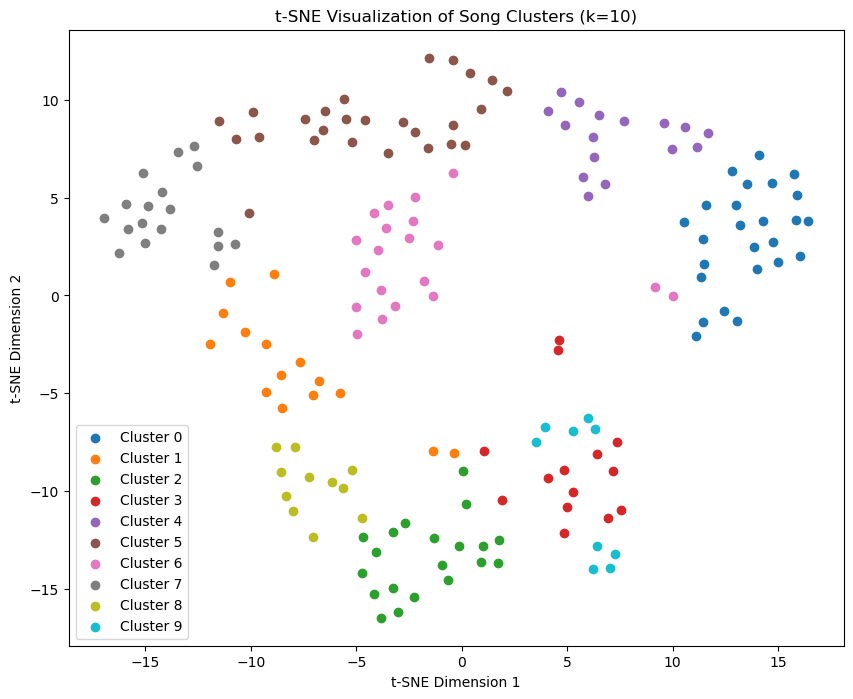

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
from sklearn.metrics import silhouette_score

#define a function to extract top topics for each song and perform clustering
def cluster_songs_based_on_topics(filtered_df, corpus_bow, top_n=3, n_clusters=10):
    #extract top topics for each song
    top_topics_list = []

    for song_title, text in zip(filtered_df['song_title'], corpus_bow):
        top_topics_and_words = identify_top_topics_and_words(song_title, text, top_n=top_n)
        top_topics = [topic for topic, _, _, _ in top_topics_and_words]
        #ensure each song has exactly top_n topics
        if len(top_topics) < top_n:
            top_topics += [0] * (top_n - len(top_topics))  # Padding with 0 if fewer topics
        top_topics_list.append(top_topics)

    #convert the list to a numpy array
    X = np.array(top_topics_list)

    #perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    return X, clusters

#convert preprocessed lyrics to bag-of-words representation
corpus_bow = [dictionary.doc2bow(text) for text in filtered_df['processed_lyrics']]

#perform clustering for k = 10
X, clusters = cluster_songs_based_on_topics(filtered_df, corpus_bow, top_n=3, n_clusters=10)

#perform dimensionality reduction with t-SNE
perplexity = min(20, len(X) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_embedded = tsne.fit_transform(X)

#plot the clusters
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(clusters):
    plt.scatter(X_embedded[clusters == cluster_label, 0],
                X_embedded[clusters == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('t-SNE Visualization of Song Clusters (k=10)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [101]:
#model evaluation
from sklearn.metrics import silhouette_score

#compute silhouette score for k = 9
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3270336688507246


In [60]:
#model evaluation
from sklearn.metrics import silhouette_score

#compute silhouette score for k = 10
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.31991786112582543
